In [4]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.


In [3]:
import findspark
findspark.init()

In [5]:
import pandas as pd

# Load the dataset
file_path = 'LCD_sample.csv'
data = pd.read_csv(file_path)

# Inspecting the data
print(data.head())  # See the first few rows
print(data.info())  # Get detailed info about data types and non-null values

# Handling missing values
# Example: Drop any rows where 'HourlyVisibility' is null
data = data[data['HourlyVisibility'].notna()]

# Removing duplicates
data = data.drop_duplicates()

# Dropping irrelevant columns
# Example: Drop the 'STATION_NAME' column
data = data.drop(columns=['STATION_NAME'])

# Convert data types
# Example: Convert 'DATE' to datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%m/%d/%Y %H:%M')

# Check the cleaned data
print(data.head())
print(data.info())

# Save the cleaned data
data.to_csv('cleaned_data.csv', index=False)


      STATION                               STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
1  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
2  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
3  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   
4  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8    41.995   

   LONGITUDE           DATE reportType  HourlySkyConditions  HourlyVisibility  \
0   -87.9336  3/1/2014 0:51      FM-15  SCT:04 70 OVC:08 90             10.00   
1   -87.9336  3/1/2014 1:51      FM-15            OVC:08 50             10.00   
2   -87.9336  3/1/2014 2:51      FM-15            OVC:08 29              6.00   
3   -87.9336  3/1/2014 3:51      FM-15              VV:09 9              0.75   
4   -87.9336  3/1/2014 4:51      FM-15             OVC:08 8             10.00   

  HourlyPresentWeatherType

In [6]:
# Drop columns with all missing values
data = data.dropna(axis=1, how='all')

# Fill missing values in 'HourlyPresentWeatherType' with a placeholder string if necessary
data['HourlyPresentWeatherType'] = data['HourlyPresentWeatherType'].fillna('Not Available')

# Convert categorical wind direction to numeric codes if needed
wind_directions = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
                   'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
                   'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
                   'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}
data['HourlyWindDirection'] = data['HourlyWindDirection'].map(wind_directions)

# Normalize or scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['HourlyVisibility', 'HourlyDryBulbTemperatureF']] = scaler.fit_transform(data[['HourlyVisibility', 'HourlyDryBulbTemperatureF']])

# Check the final state of the data
print(data.head())
print(data.info())

      STATION  ELEVATION  LATITUDE  LONGITUDE                DATE reportType  \
0  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 00:51:00      FM-15   
1  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 01:51:00      FM-15   
2  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 02:51:00      FM-15   
3  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 03:51:00      FM-15   
4  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 04:51:00      FM-15   

   HourlySkyConditions  HourlyVisibility HourlyPresentWeatherType  \
0  SCT:04 70 OVC:08 90          1.000000            Not Available   
1            OVC:08 50          1.000000            Not Available   
2            OVC:08 29          0.578947          -SN:03 |SN:71 |   
3              VV:09 9          0.026316          -SN:03 |SN:71 |   
4             OVC:08 8          1.000000            Not Available   

   HourlyDryBulbTemperatureF  ...  DailyMaximumDryBulbTemperature  \
0                   0.455882  ...  

In [7]:
# Check unique values in HourlyWindDirection before mapping
print(data['HourlyWindDirection'].unique())

# Impute missing values for 'HourlyWindGustSpeed' with median
if data['HourlyWindGustSpeed'].isna().sum() > 0:
    median_wind_gust = data['HourlyWindGustSpeed'].median()
    data['HourlyWindGustSpeed'] = data['HourlyWindGustSpeed'].fillna(median_wind_gust)

# Example of feature engineering: Extract month from DATE
data['Month'] = data['DATE'].dt.month

# Check the dataset again
print(data.head())


[nan]
      STATION  ELEVATION  LATITUDE  LONGITUDE                DATE reportType  \
0  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 00:51:00      FM-15   
1  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 01:51:00      FM-15   
2  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 02:51:00      FM-15   
3  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 03:51:00      FM-15   
4  WBAN:94846      201.8    41.995   -87.9336 2014-03-01 04:51:00      FM-15   

   HourlySkyConditions  HourlyVisibility HourlyPresentWeatherType  \
0  SCT:04 70 OVC:08 90          1.000000            Not Available   
1            OVC:08 50          1.000000            Not Available   
2            OVC:08 29          0.578947          -SN:03 |SN:71 |   
3              VV:09 9          0.026316          -SN:03 |SN:71 |   
4             OVC:08 8          1.000000            Not Available   

   HourlyDryBulbTemperatureF  ...  DailyMinimumDryBulbTemperature  \
0                   0.455882 

In [11]:
import os

# Specify the directory using double backslashes
directory = "C:\\Users\\Pooja Bavisetti\\Documents\\603\\603-project"
filename = "cleaned_final_data.csv"
full_path = os.path.join(directory, filename)

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the cleaned data to the new CSV file
data.to_csv(full_path, index=False)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset using a correct file path
data = pd.read_csv(r'C:\Users\Pooja Bavisetti\Documents\603\603-project\cleaned_final_data.csv')

# Select only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)


                                            ELEVATION  LATITUDE  LONGITUDE  \
ELEVATION                                         NaN       NaN        NaN   
LATITUDE                                          NaN       NaN        NaN   
LONGITUDE                                         NaN       NaN        NaN   
HourlyVisibility                                  NaN       NaN        NaN   
HourlyDryBulbTemperatureF                         NaN       NaN        NaN   
HourlyDryBulbTemperatureC                         NaN       NaN        NaN   
HourlyWetBulbTemperatureF                         NaN       NaN        NaN   
HourlyWetBulbTemperatureC                         NaN       NaN        NaN   
HourlyDewPointTemperatureF                        NaN       NaN        NaN   
HourlyDewPointTemperatureC                        NaN       NaN        NaN   
HourlyRelativeHumidity                            NaN       NaN        NaN   
HourlyWindSpeed                                   NaN       NaN 

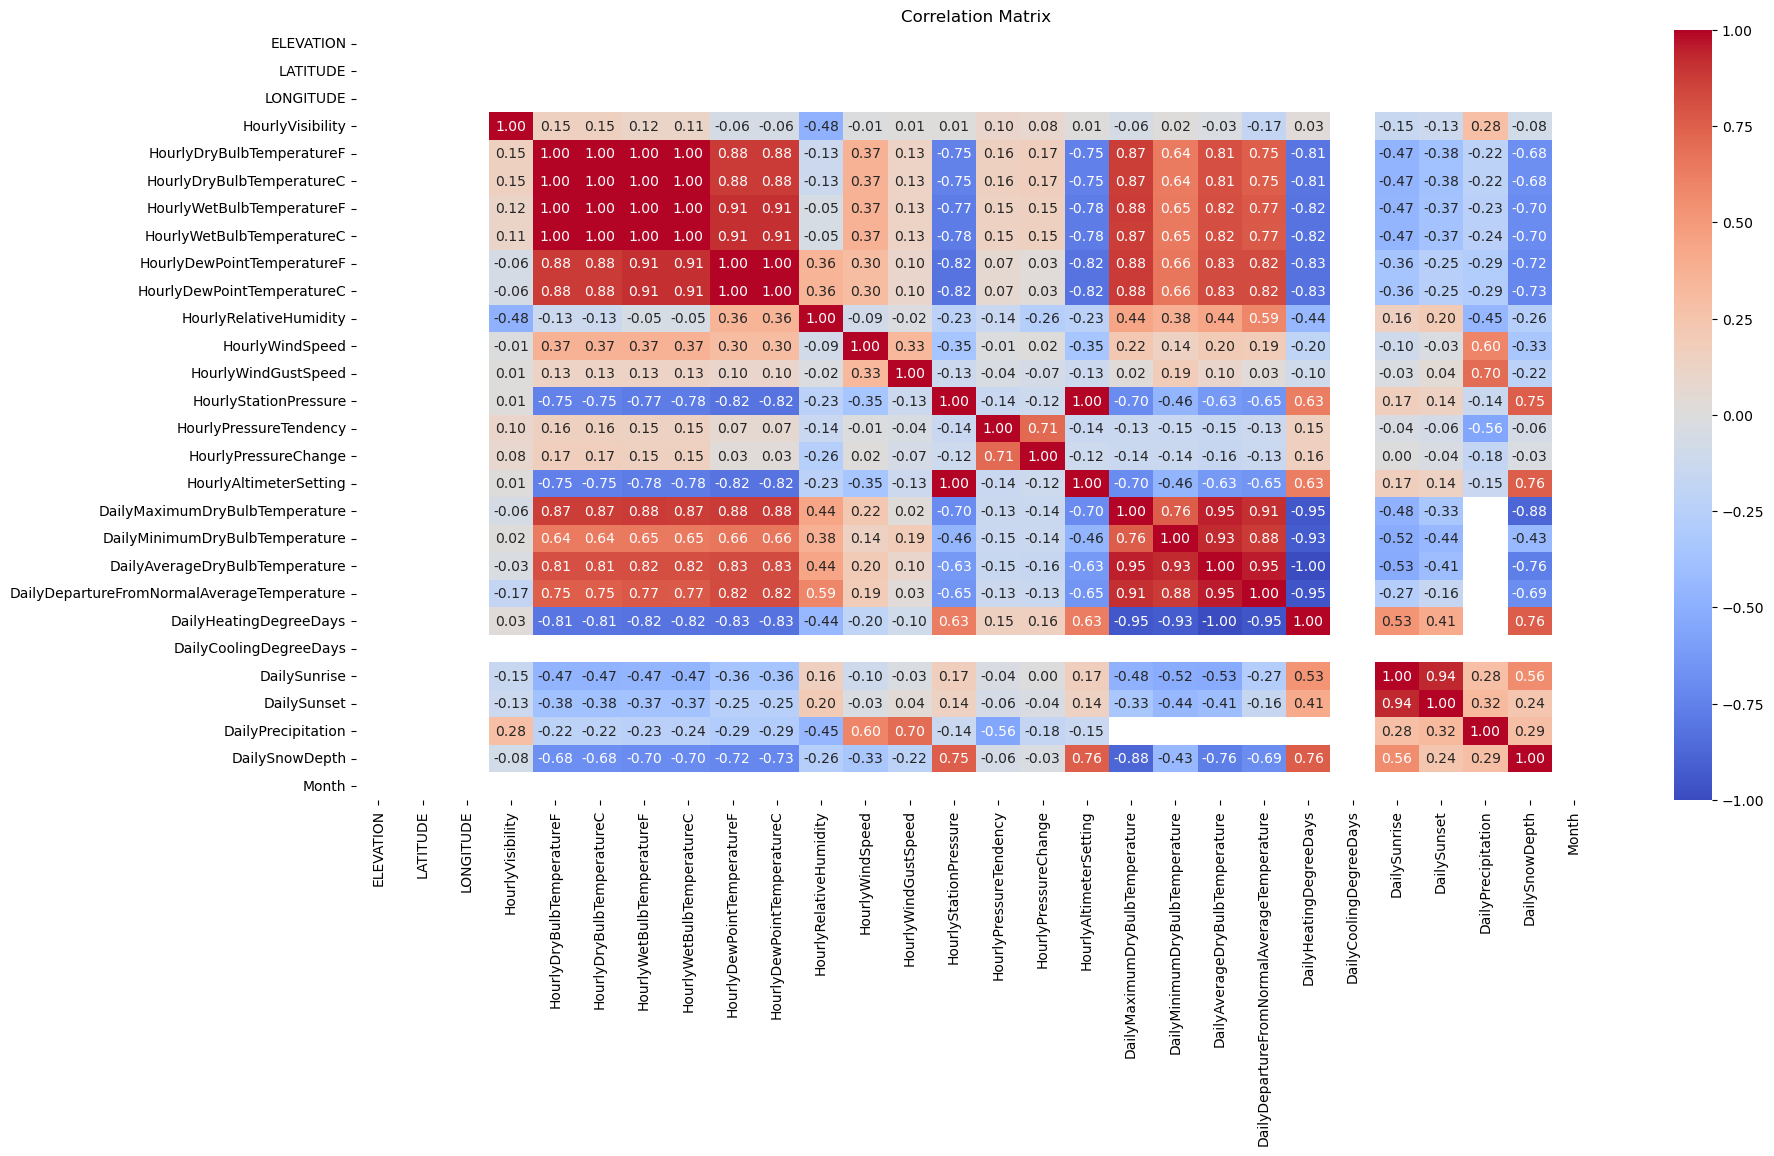

In [18]:
# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()